# A Gentle introduction to Machine Learning 

Following notebook was created while watching Kylie Ying's YouTube Video 

#Classification Algorithms

<h3> The Magic dataset </h3>
The dataset is about the Gamma Telescope.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Column names were not added into the database and hence we were required to do so through the following lines of code.

In [ ]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans",
        "fAlpha","fDist","class"]
df = pd.read_csv("magic04.data", names = cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

Typecasting the 'class' into int.



In [ ]:
df["class"] = (df["class"]=="g").astype(int)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

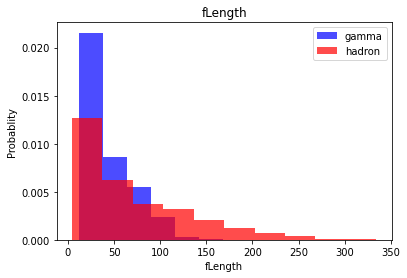

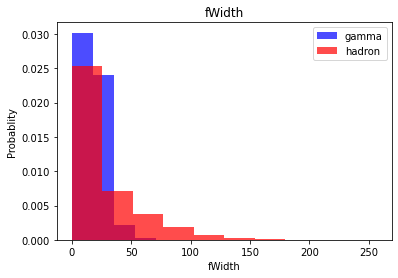

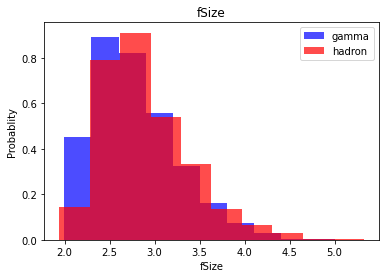

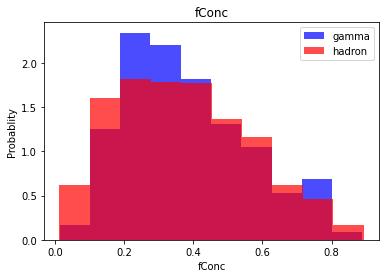

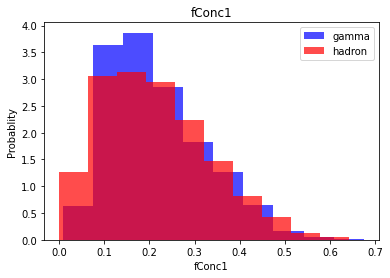

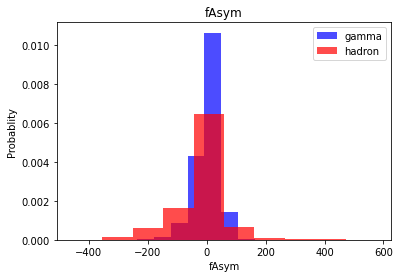

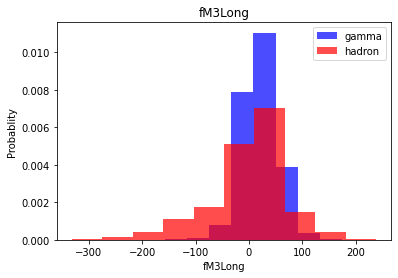

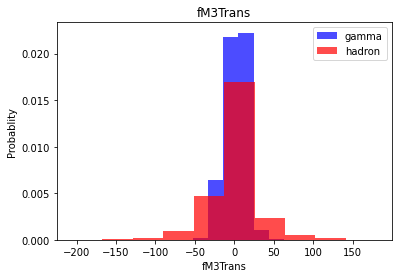

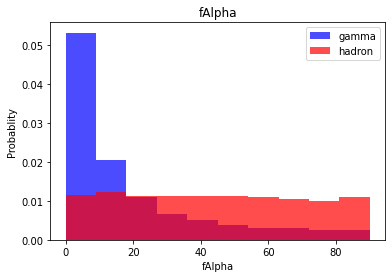

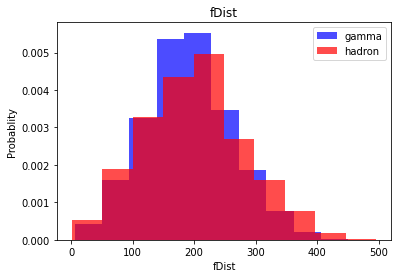

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color = "blue", label = "gamma", alpha = 0.7, density = True)
  plt.hist(df[df["class"]==0][label], color = "red", label = "hadron", alpha = 0.7, density = True)
  plt.title(label)
  plt.ylabel("Probablity")
  plt.xlabel(label)
  plt.legend()
  plt.show()

Splitting the dataset so that it can be used for training, Validation and testing

In [ ]:
train, valid, test = np.split(df.sample(frac = 1), [int(0.6*len(df)), int(0.8*len(df))])

Since the datapoints for class == 1 were more than class == 0 , we were required to do oversampling

In [ ]:
def scale_dataset(dataframe, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample :
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X,y)

  data = np.hstack((X, np.reshape(y, (-1,1) )))  # -1 --> len(y)

  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample = True)
vaild, X_valid, y_valid = scale_dataset(valid, oversample = False)
test, X_test, y_test = scale_dataset(test, oversample = False)

In [ ]:
print(len(y_train))

print(sum(y_train == 1))
print(sum(y_train == 0))

14688
7344
7344


<h2><b>kNN</b></h2>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1310
           1       0.86      0.87      0.86      2494

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



<h2><b>Naive Bayes</b></h2>

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.40      0.50      1310
           1       0.74      0.89      0.81      2494

    accuracy                           0.72      3804
   macro avg       0.70      0.64      0.65      3804
weighted avg       0.71      0.72      0.70      3804



<h2><b>Logistic Regression</b></h2>

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1310
           1       0.85      0.83      0.84      2494

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



<h2><b>SVM</b></h2>

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1310
           1       0.89      0.90      0.90      2494

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



The best accuracy out of the 4 models studied so far is given by SVM. 

Let's try to beat it through a Neural Net

<h2><b>Neural Network</b></h2>

In [ ]:
import tensorflow  as tf

In [ ]:
def plot_history(history):
  fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary CrossEntropy')
  ax1.grid(True)
  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  plt.show()


In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train,
    epochs = epochs, batch_size = batch_size,
    validation_split=0.2,
    verbose = 0
  )
  return nn_model, history

16 nodes,0 dropout, 0.01 lr, 32 batch-size


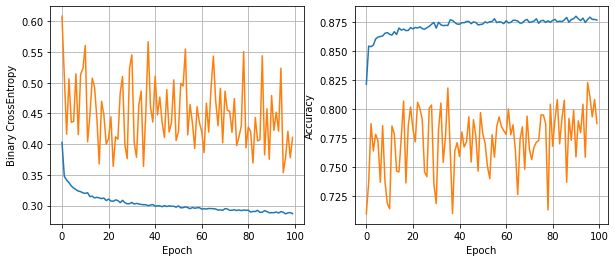

119/119 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.8686
16 nodes,0 dropout, 0.01 lr, 64 batch-size


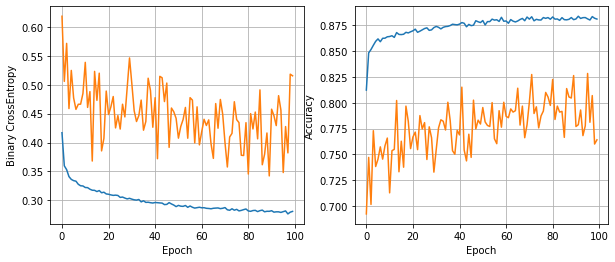

119/119 [==============================] - 0s 2ms/step - loss: 0.3192 - accuracy: 0.8783
16 nodes,0 dropout, 0.01 lr, 128 batch-size


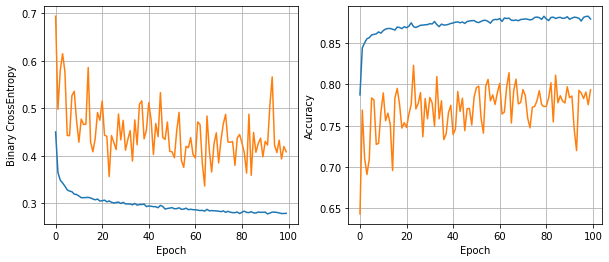

119/119 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.8733
16 nodes,0 dropout, 0.005 lr, 32 batch-size


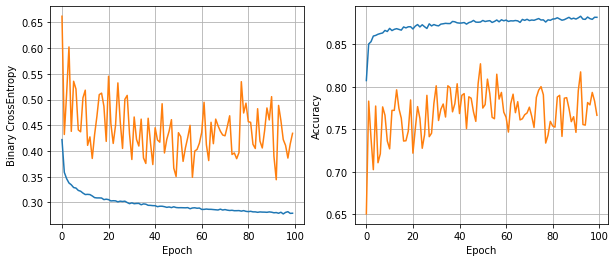

119/119 [==============================] - 0s 2ms/step - loss: 0.3108 - accuracy: 0.8804
16 nodes,0 dropout, 0.005 lr, 64 batch-size


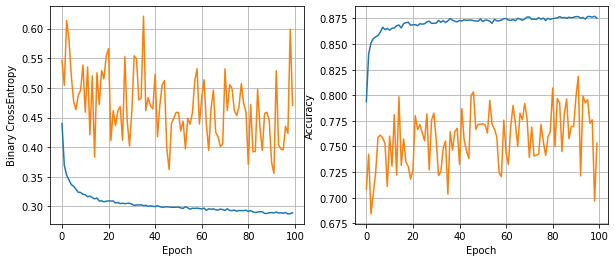

119/119 [==============================] - 0s 2ms/step - loss: 0.3137 - accuracy: 0.8778
16 nodes,0 dropout, 0.005 lr, 128 batch-size


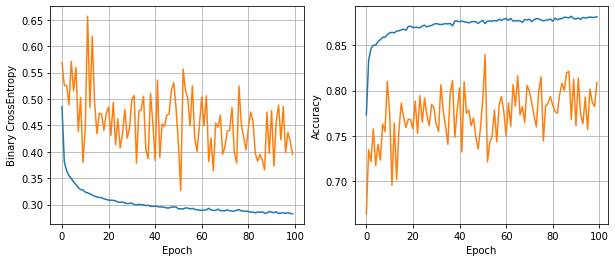

119/119 [==============================] - 0s 3ms/step - loss: 0.3225 - accuracy: 0.8678
16 nodes,0 dropout, 0.001 lr, 32 batch-size


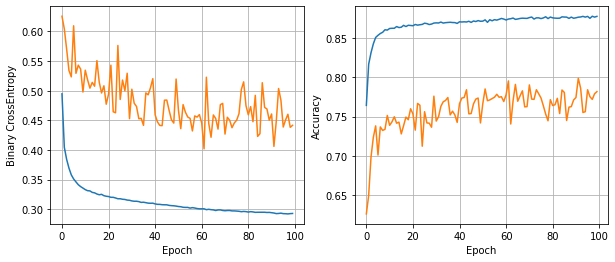

119/119 [==============================] - 0s 2ms/step - loss: 0.3103 - accuracy: 0.8785
16 nodes,0 dropout, 0.001 lr, 64 batch-size


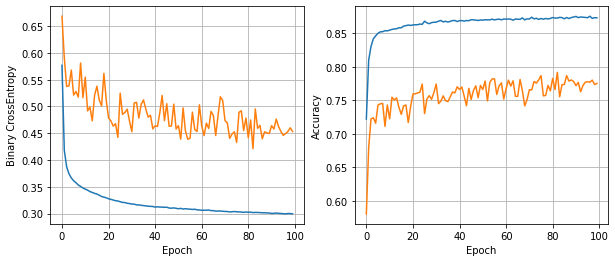

119/119 [==============================] - 0s 2ms/step - loss: 0.3069 - accuracy: 0.8751
16 nodes,0 dropout, 0.001 lr, 128 batch-size


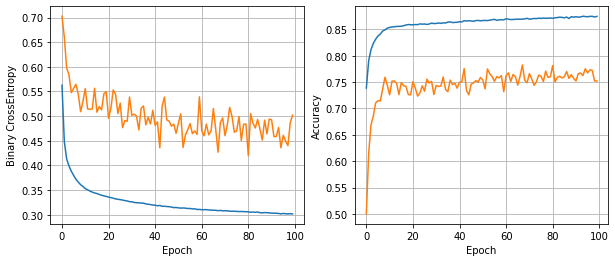

119/119 [==============================] - 0s 2ms/step - loss: 0.2991 - accuracy: 0.8796
16 nodes,0.2 dropout, 0.01 lr, 32 batch-size


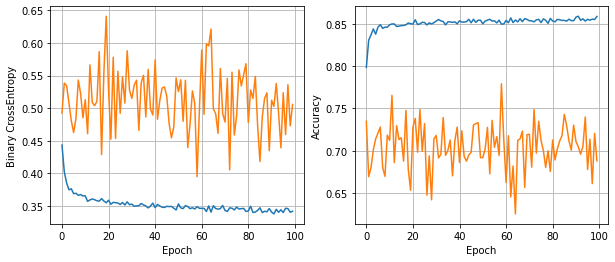

119/119 [==============================] - 0s 2ms/step - loss: 0.3225 - accuracy: 0.8770
16 nodes,0.2 dropout, 0.01 lr, 64 batch-size


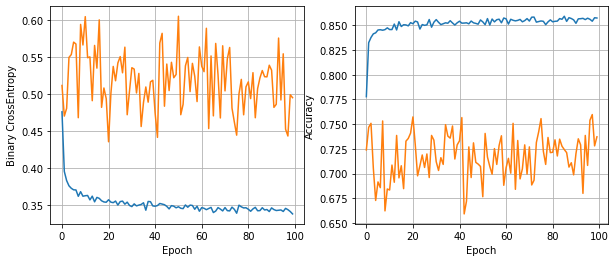

119/119 [==============================] - 0s 2ms/step - loss: 0.3045 - accuracy: 0.8767
16 nodes,0.2 dropout, 0.01 lr, 128 batch-size


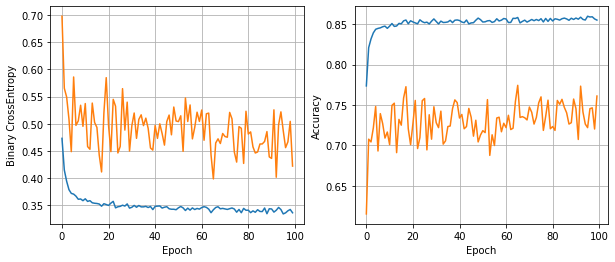

119/119 [==============================] - 0s 2ms/step - loss: 0.3205 - accuracy: 0.8715
16 nodes,0.2 dropout, 0.005 lr, 32 batch-size


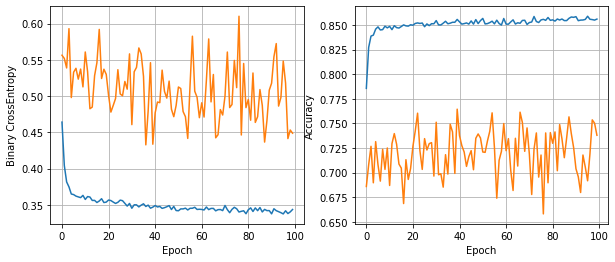

119/119 [==============================] - 0s 2ms/step - loss: 0.3130 - accuracy: 0.8780
16 nodes,0.2 dropout, 0.005 lr, 64 batch-size


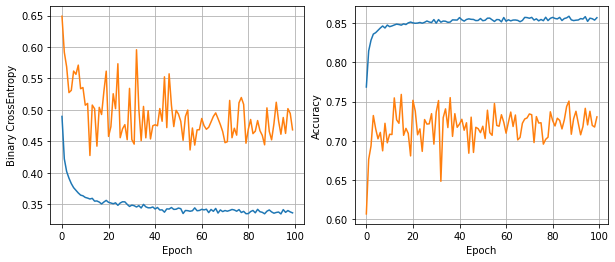

119/119 [==============================] - 0s 2ms/step - loss: 0.3137 - accuracy: 0.8741
16 nodes,0.2 dropout, 0.005 lr, 128 batch-size


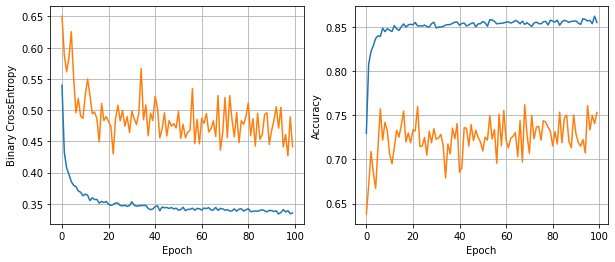

119/119 [==============================] - 0s 2ms/step - loss: 0.3193 - accuracy: 0.8749
16 nodes,0.2 dropout, 0.001 lr, 32 batch-size


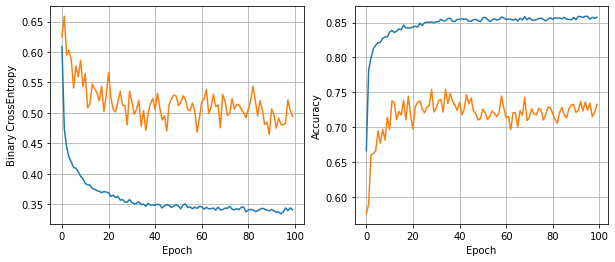

119/119 [==============================] - 0s 2ms/step - loss: 0.3089 - accuracy: 0.8754
16 nodes,0.2 dropout, 0.001 lr, 64 batch-size


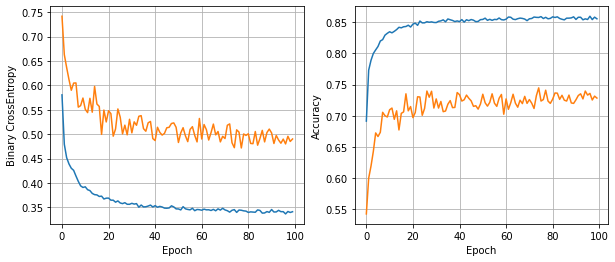

119/119 [==============================] - 0s 2ms/step - loss: 0.3080 - accuracy: 0.8793
16 nodes,0.2 dropout, 0.001 lr, 128 batch-size


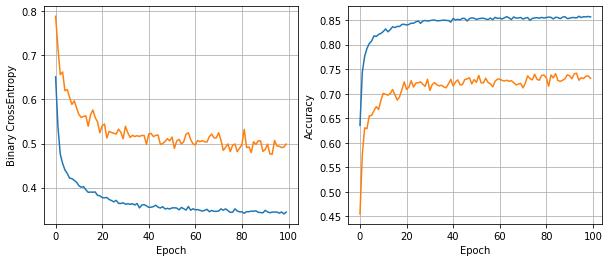

119/119 [==============================] - 0s 2ms/step - loss: 0.3069 - accuracy: 0.8767
32 nodes,0 dropout, 0.01 lr, 32 batch-size


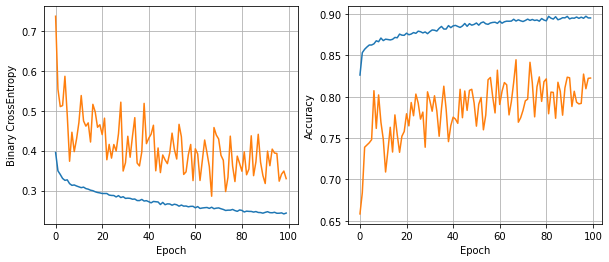

119/119 [==============================] - 0s 2ms/step - loss: 0.3604 - accuracy: 0.8778
32 nodes,0 dropout, 0.01 lr, 64 batch-size


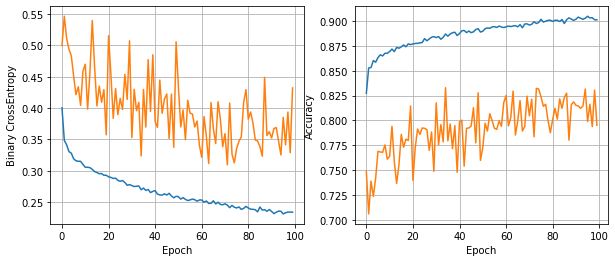

119/119 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.8728
32 nodes,0 dropout, 0.01 lr, 128 batch-size


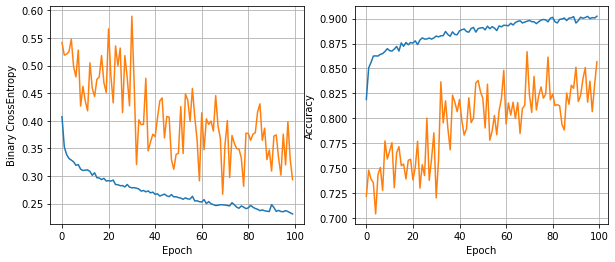

119/119 [==============================] - 0s 2ms/step - loss: 0.3727 - accuracy: 0.8654
32 nodes,0 dropout, 0.005 lr, 32 batch-size


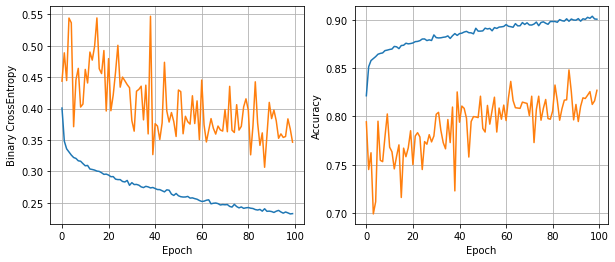

119/119 [==============================] - 0s 2ms/step - loss: 0.3588 - accuracy: 0.8651
32 nodes,0 dropout, 0.005 lr, 64 batch-size


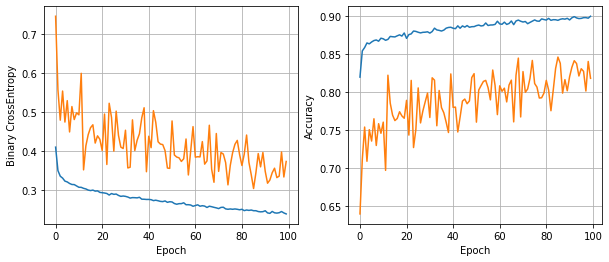

119/119 [==============================] - 0s 2ms/step - loss: 0.3345 - accuracy: 0.8741
32 nodes,0 dropout, 0.005 lr, 128 batch-size


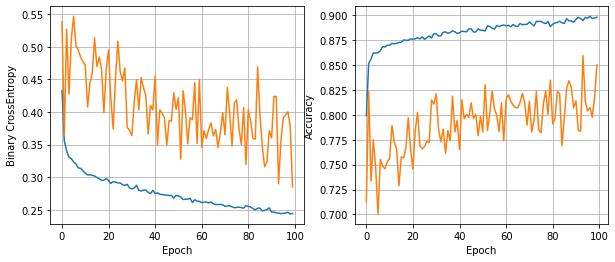

119/119 [==============================] - 0s 2ms/step - loss: 0.3553 - accuracy: 0.8675
32 nodes,0 dropout, 0.001 lr, 32 batch-size


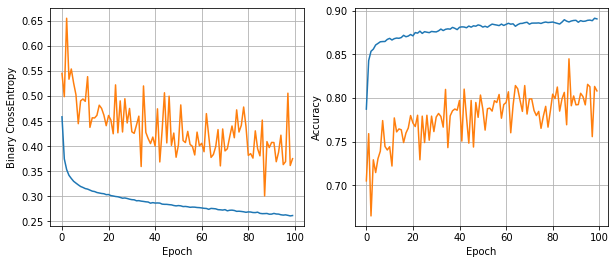

119/119 [==============================] - 0s 2ms/step - loss: 0.3228 - accuracy: 0.8738
32 nodes,0 dropout, 0.001 lr, 64 batch-size


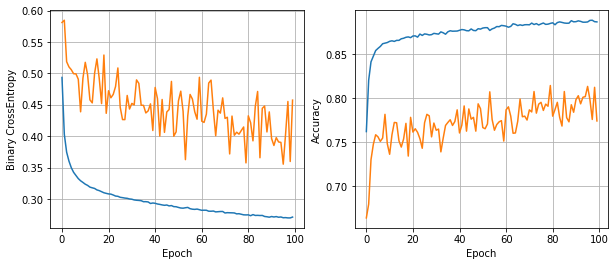

119/119 [==============================] - 0s 2ms/step - loss: 0.3084 - accuracy: 0.8754
32 nodes,0 dropout, 0.001 lr, 128 batch-size


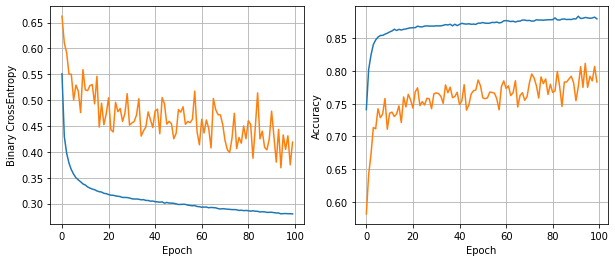

119/119 [==============================] - 0s 2ms/step - loss: 0.3090 - accuracy: 0.8759
32 nodes,0.2 dropout, 0.01 lr, 32 batch-size


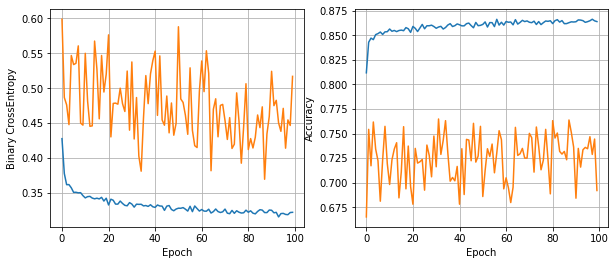

119/119 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.8736
32 nodes,0.2 dropout, 0.01 lr, 64 batch-size


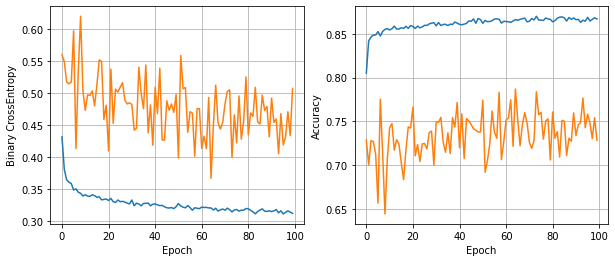

119/119 [==============================] - 0s 2ms/step - loss: 0.3010 - accuracy: 0.8820
32 nodes,0.2 dropout, 0.01 lr, 128 batch-size


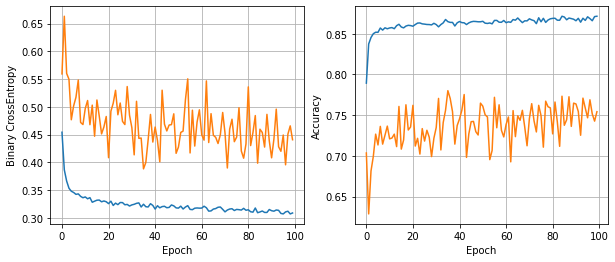

119/119 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.8741
32 nodes,0.2 dropout, 0.005 lr, 32 batch-size


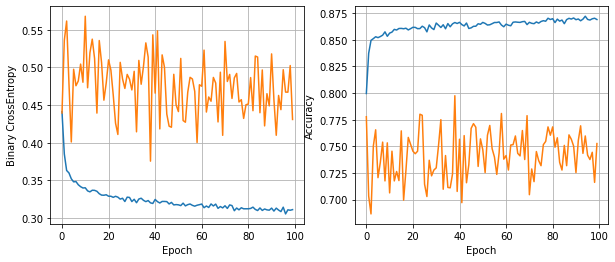

119/119 [==============================] - 0s 2ms/step - loss: 0.3046 - accuracy: 0.8807
32 nodes,0.2 dropout, 0.005 lr, 64 batch-size


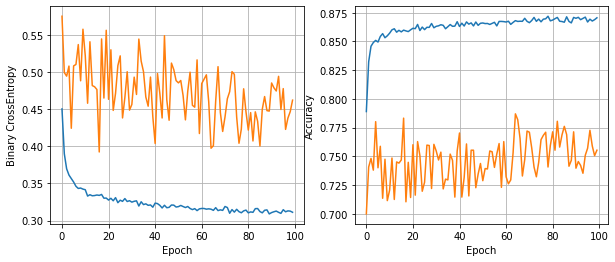

119/119 [==============================] - 0s 2ms/step - loss: 0.2989 - accuracy: 0.8785
32 nodes,0.2 dropout, 0.005 lr, 128 batch-size


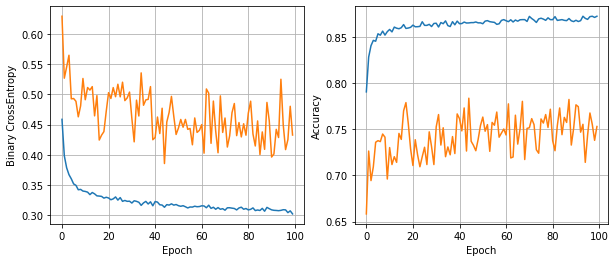

119/119 [==============================] - 0s 2ms/step - loss: 0.3002 - accuracy: 0.8801
32 nodes,0.2 dropout, 0.001 lr, 32 batch-size


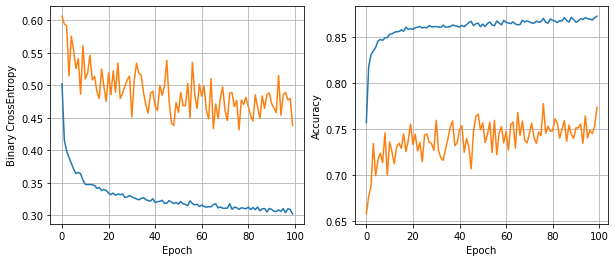

119/119 [==============================] - 0s 3ms/step - loss: 0.3008 - accuracy: 0.8783
32 nodes,0.2 dropout, 0.001 lr, 64 batch-size


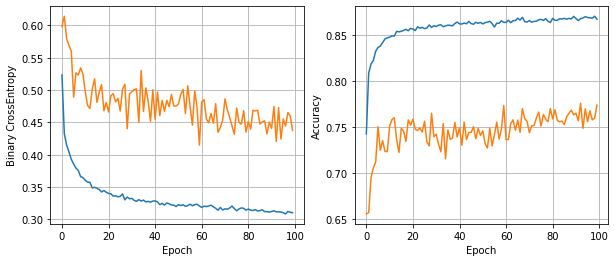

119/119 [==============================] - 0s 3ms/step - loss: 0.3043 - accuracy: 0.8785
32 nodes,0.2 dropout, 0.001 lr, 128 batch-size


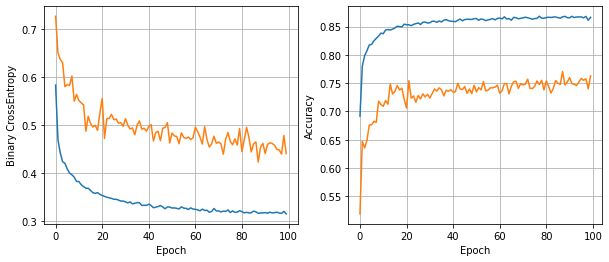

119/119 [==============================] - 0s 2ms/step - loss: 0.3013 - accuracy: 0.8796
64 nodes,0 dropout, 0.01 lr, 32 batch-size


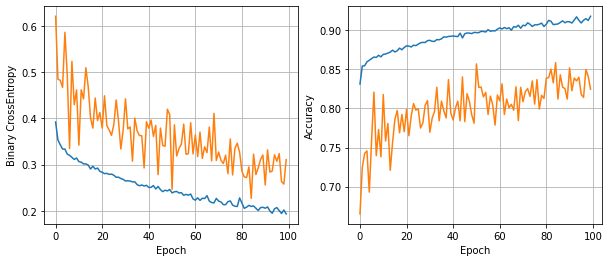

119/119 [==============================] - 0s 2ms/step - loss: 0.5112 - accuracy: 0.8665
64 nodes,0 dropout, 0.01 lr, 64 batch-size


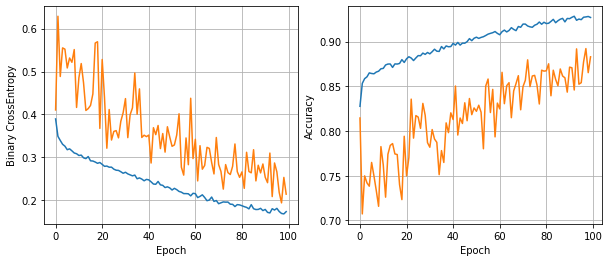

119/119 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.8517
64 nodes,0 dropout, 0.01 lr, 128 batch-size


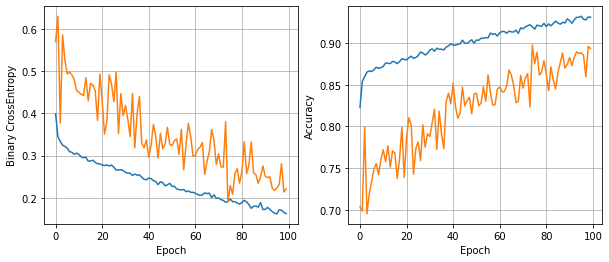

119/119 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.8644
64 nodes,0 dropout, 0.005 lr, 32 batch-size


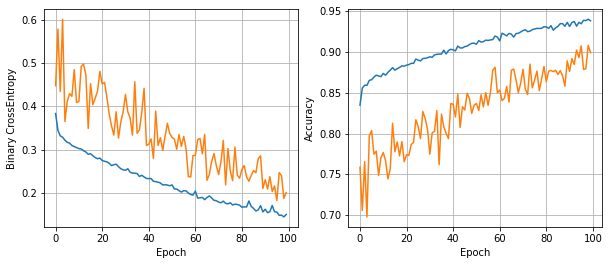

119/119 [==============================] - 0s 2ms/step - loss: 0.6022 - accuracy: 0.8559
64 nodes,0 dropout, 0.005 lr, 64 batch-size


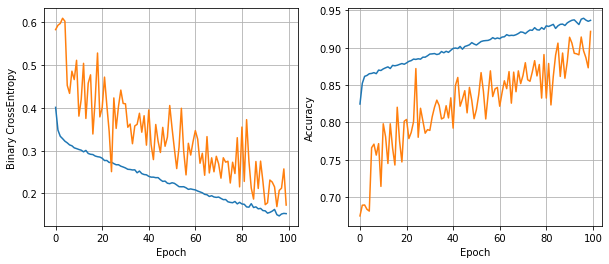

119/119 [==============================] - 0s 3ms/step - loss: 0.5012 - accuracy: 0.8478
64 nodes,0 dropout, 0.005 lr, 128 batch-size


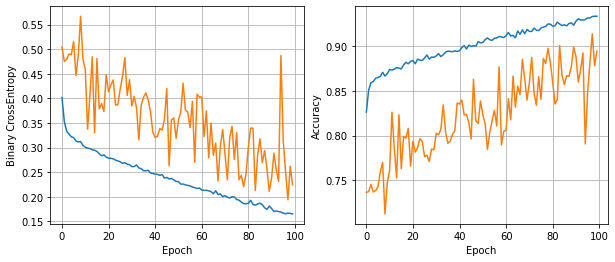

119/119 [==============================] - 0s 2ms/step - loss: 0.4783 - accuracy: 0.8544
64 nodes,0 dropout, 0.001 lr, 32 batch-size


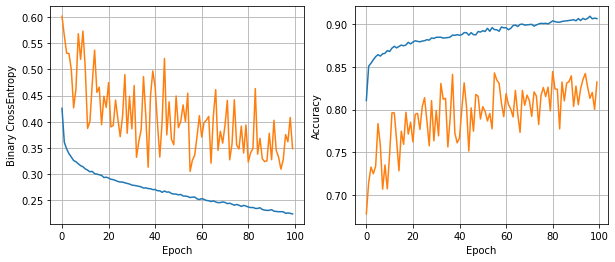

119/119 [==============================] - 0s 2ms/step - loss: 0.3486 - accuracy: 0.8630
64 nodes,0 dropout, 0.001 lr, 64 batch-size


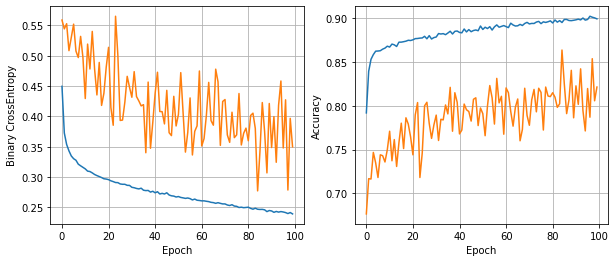

119/119 [==============================] - 0s 2ms/step - loss: 0.3193 - accuracy: 0.8741
64 nodes,0 dropout, 0.001 lr, 128 batch-size


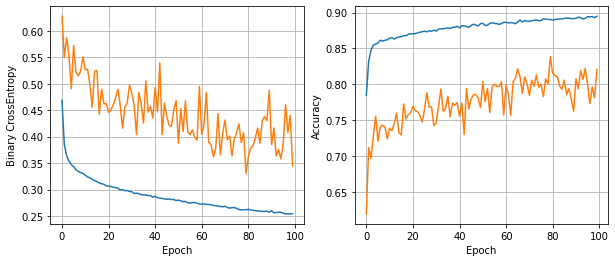

119/119 [==============================] - 0s 2ms/step - loss: 0.3243 - accuracy: 0.8743
64 nodes,0.2 dropout, 0.01 lr, 32 batch-size


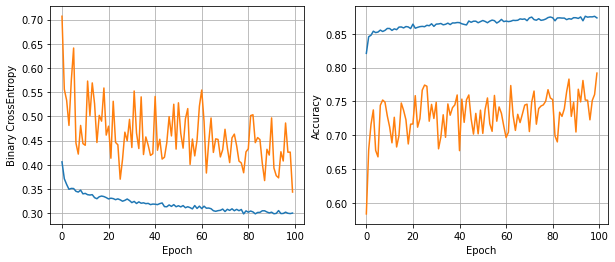

119/119 [==============================] - 0s 3ms/step - loss: 0.3176 - accuracy: 0.8809
64 nodes,0.2 dropout, 0.01 lr, 64 batch-size


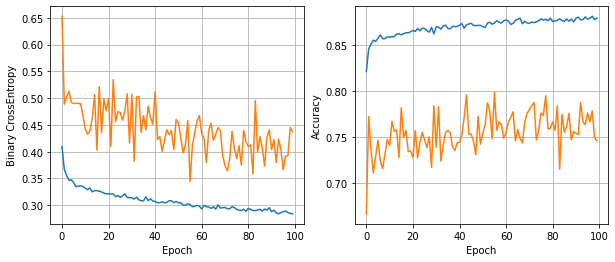

119/119 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.8785
64 nodes,0.2 dropout, 0.01 lr, 128 batch-size


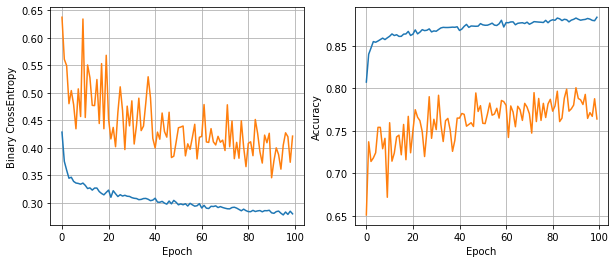

119/119 [==============================] - 0s 2ms/step - loss: 0.3084 - accuracy: 0.8812
64 nodes,0.2 dropout, 0.005 lr, 32 batch-size


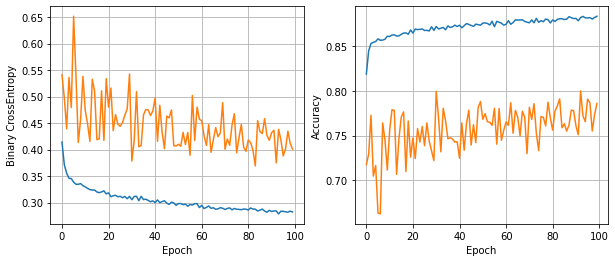

119/119 [==============================] - 0s 2ms/step - loss: 0.3064 - accuracy: 0.8804
64 nodes,0.2 dropout, 0.005 lr, 64 batch-size


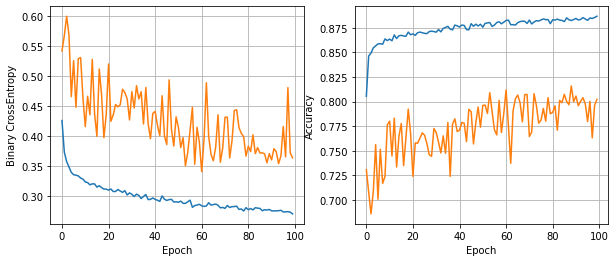

119/119 [==============================] - 0s 3ms/step - loss: 0.3015 - accuracy: 0.8872
64 nodes,0.2 dropout, 0.005 lr, 128 batch-size


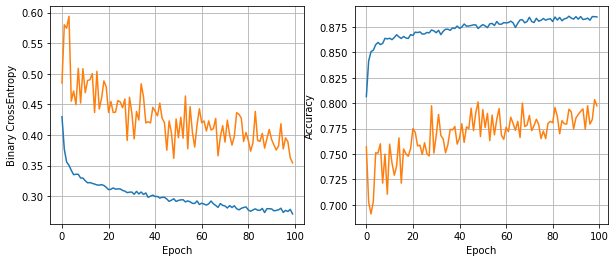

119/119 [==============================] - 0s 3ms/step - loss: 0.3137 - accuracy: 0.8783
64 nodes,0.2 dropout, 0.001 lr, 32 batch-size


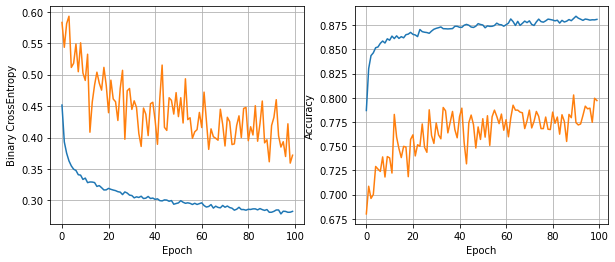

119/119 [==============================] - 0s 2ms/step - loss: 0.2979 - accuracy: 0.8828
64 nodes,0.2 dropout, 0.001 lr, 64 batch-size


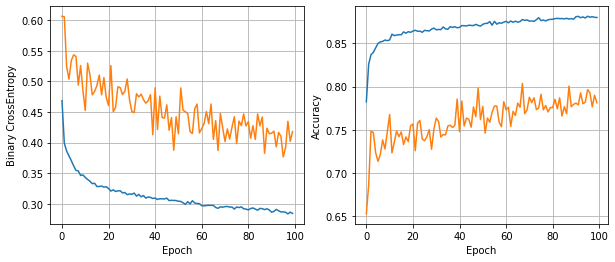

119/119 [==============================] - 0s 2ms/step - loss: 0.2932 - accuracy: 0.8825
64 nodes,0.2 dropout, 0.001 lr, 128 batch-size


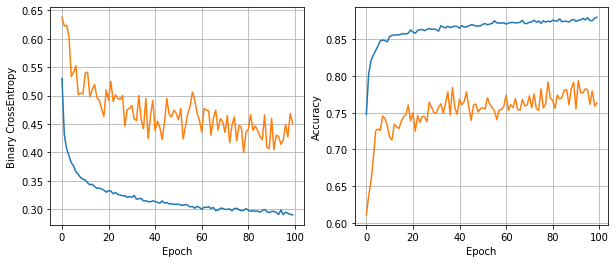

119/119 [==============================] - 0s 2ms/step - loss: 0.2927 - accuracy: 0.8817


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01,0.005,0.001]:
      for batch_size in [32,64,128]:
        print(f"{num_nodes} nodes,{dropout_prob} dropout, {lr} lr, {batch_size} batch-size")
        model, history = train_model(X_train, y_train,num_nodes, dropout_prob,lr,batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1)

119/119 [==============================] - 0s 1ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.73      0.80      1310
           1       0.87      0.94      0.91      2494

    accuracy                           0.87      3804
   macro avg       0.87      0.84      0.85      3804
weighted avg       0.87      0.87      0.87      3804



According to the Metrics report, we were able to successfully beat the SVM classification's accuracy of 86% by training a Neural Network. The accuracy that it delivered is of 87% which is considered quite good, given the fact the model was trained without major hyper parameter tunning.    

# Supervised Machine Learning (Regression Algorithm)

<h3>Seoul Bike Dataset</h3>

The following dataset as information about the bikes used at various hours across the city of Seoul

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [2]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]

In [3]:
df = pd.read_csv("SeoulBikeData_updated.csv", encoding="utf-8").drop(["Date", "Holiday", "Seasons"], axis=1)
df.columns = dataset_cols
df["functional"] = (df["functional"]=="Yes").astype(int)
df = df[df["hour"] == 12]
df = df.drop(["hour"], axis = 1)

In [4]:
df.head()

bike_count  temp  humidity  wind  visibility  dew_pt_temp  radiation  \
12          449   1.7        23   1.4        2000        -17.2       1.11   
36          479   4.3        41   1.3        1666         -7.8       1.09   
60          333   5.8        85   1.7         349          3.4       0.43   
84          393  -0.3        38   4.8        1823        -12.9       1.11   
108         321  -2.3        25   0.0        1962        -19.7       0.00   

     rain  snow  functional  
12    0.0   0.0           1  
36    0.0   0.0           1  
60    0.0   0.0           1  
84    0.0   0.0           1  
108   0.0   0.0           1

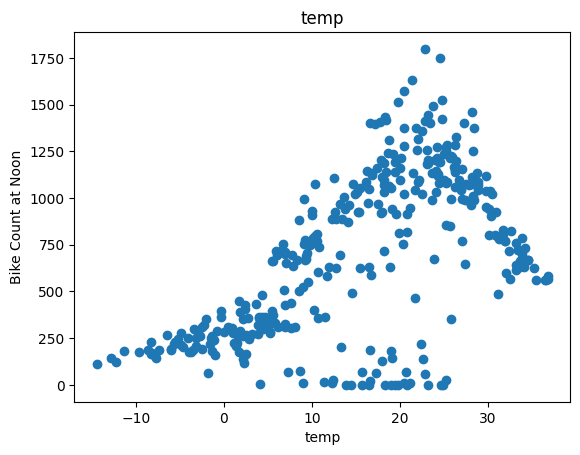

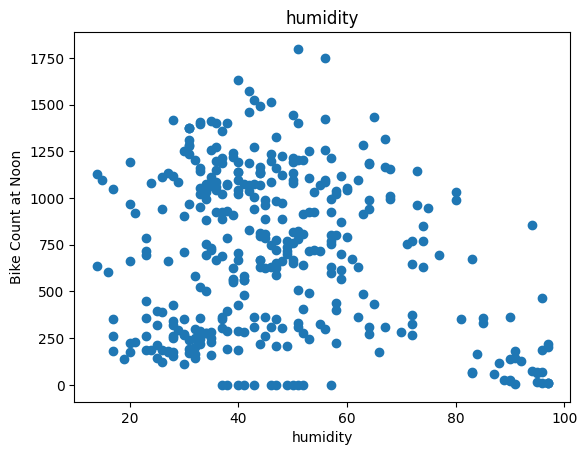

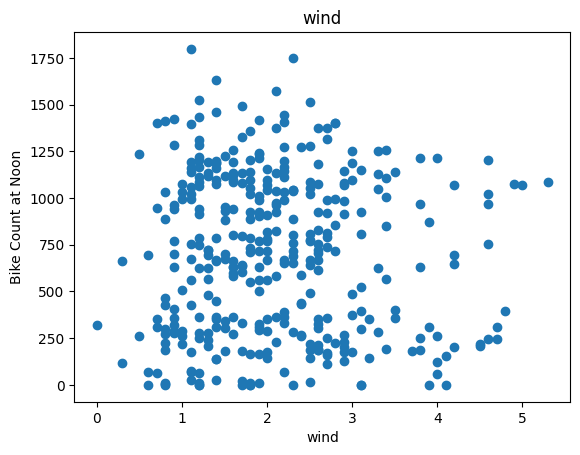

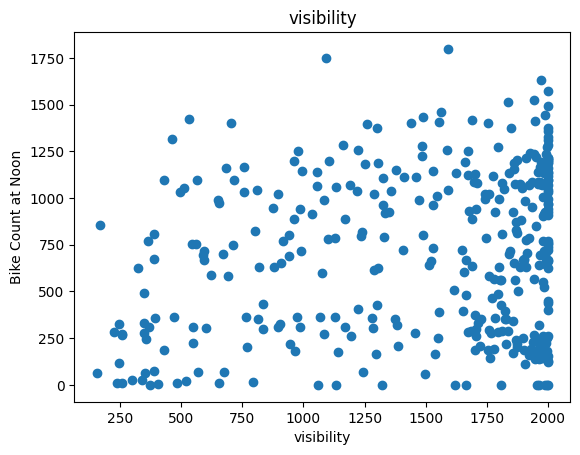

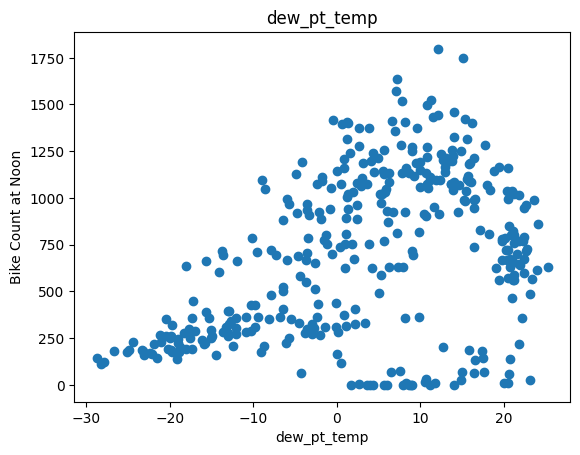

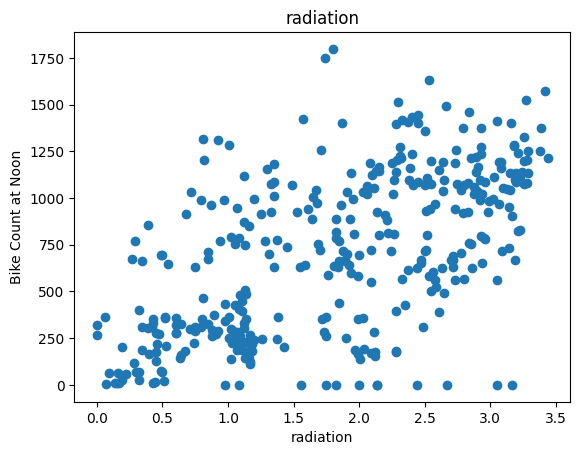

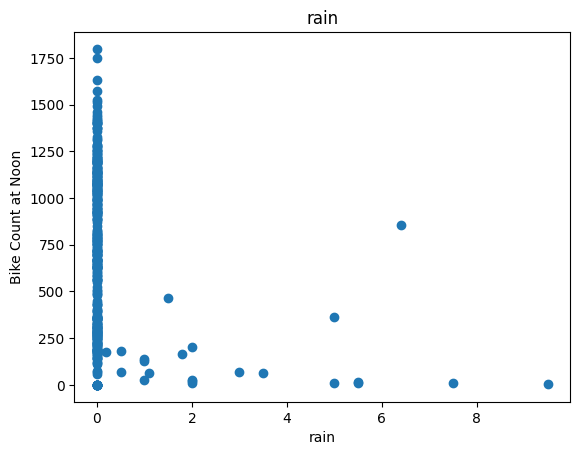

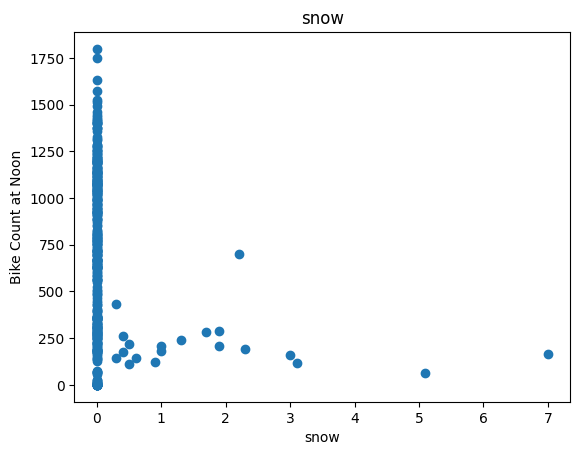

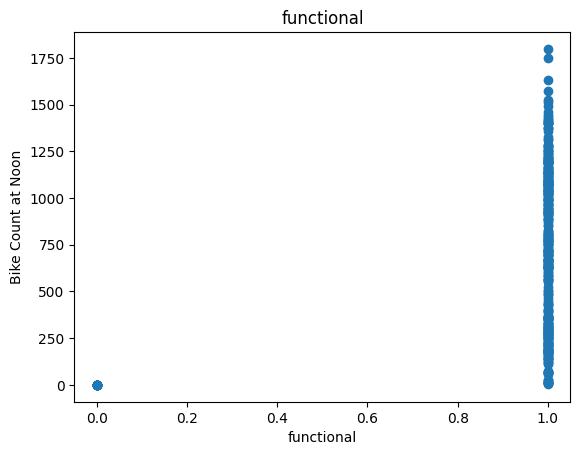

In [5]:
for label in df.columns[1:]:
  plt.scatter(df[label],df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike Count at Noon")
  plt.xlabel(label)
  plt.show()

In [6]:
df = df.drop(["wind", "visibility", "functional"], axis = 1)

In [7]:
df.head()

bike_count  temp  humidity  dew_pt_temp  radiation  rain  snow
12          449   1.7        23        -17.2       1.11   0.0   0.0
36          479   4.3        41         -7.8       1.09   0.0   0.0
60          333   5.8        85          3.4       0.43   0.0   0.0
84          393  -0.3        38        -12.9       1.11   0.0   0.0
108         321  -2.3        25        -19.7       0.00   0.0   0.0

Splitting the dataset so that it can be used for training, Validation and testing

In [8]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))]) 

In [9]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y

In [11]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [14]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [15]:
print(temp_reg.coef_, temp_reg.intercept_)

[[20.99304013]] [387.35753329]


In [18]:
temp_reg.score(X_test_temp, y_test_temp) # Some correlation between bike_count and temp

0.3588879996666896

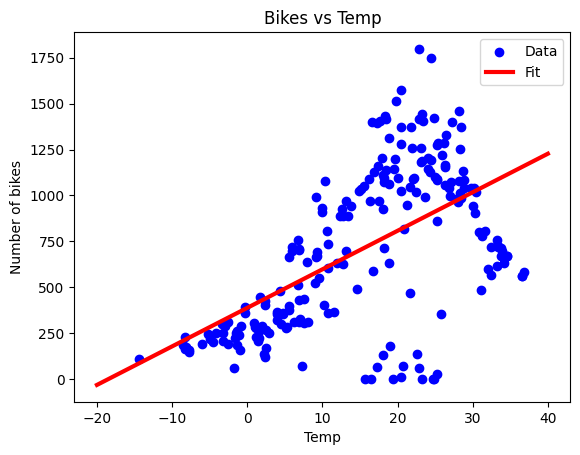

In [17]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
# Requires a 2-D array and hence the reshaping
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

<h2><b>Multiple Linear Regression</b></h2>

In [19]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])

In [20]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [21]:
all_reg.score(X_test_all, y_test_all )

0.5054144958232252

In [22]:
y_pred_lr = all_reg.predict(X_test_all)

<h2><b>Regression with Neural Net</b></h2>

In [23]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [24]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [25]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [28]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [29]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(X_val_temp, y_val_temp)
)

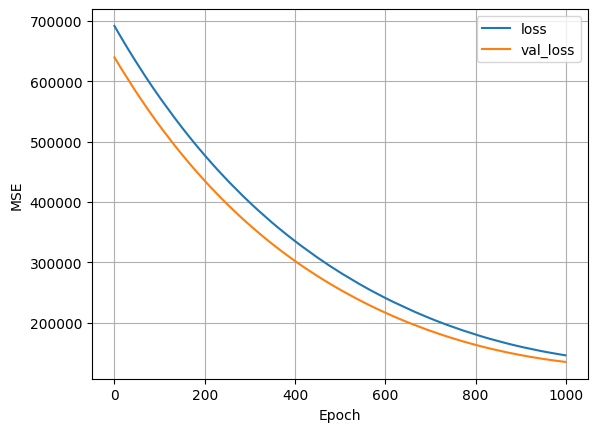

In [30]:
plot_loss(history)

In [39]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(X_train_all)

In [40]:
all_nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(1)
])

In [41]:
all_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [42]:
history = all_nn_model.fit(
    X_train_all, y_train_all,
    verbose=0,
    epochs=1000,
    validation_data=(X_val_all, y_val_all)
)

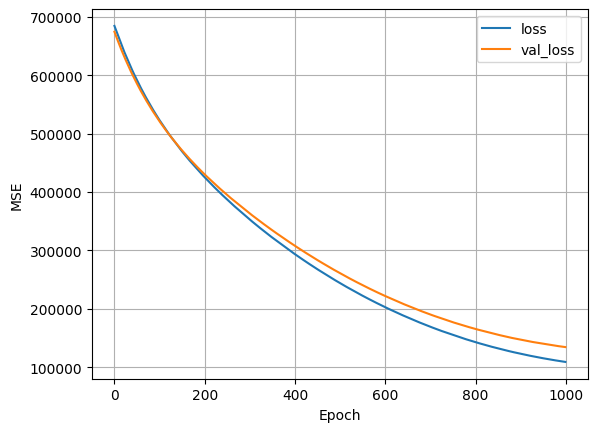

In [43]:
plot_loss(history)

<h2><b>Neural Network</b></h2>

In [44]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [45]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data=(X_val_temp, y_val_temp),
    verbose=0, epochs=100
)

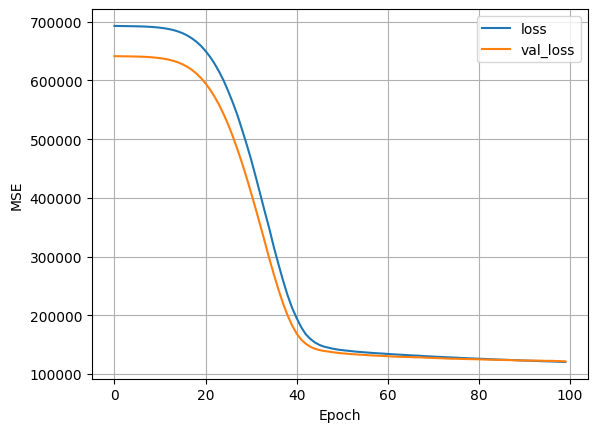

In [46]:
plot_loss(history)

4/4 [==============================] - 1s 6ms/step


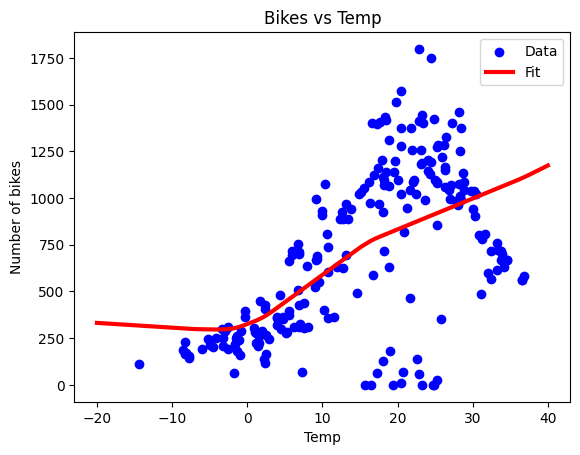

In [47]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [48]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(X_train_all)

In [49]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [50]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    verbose=0, epochs=100
)

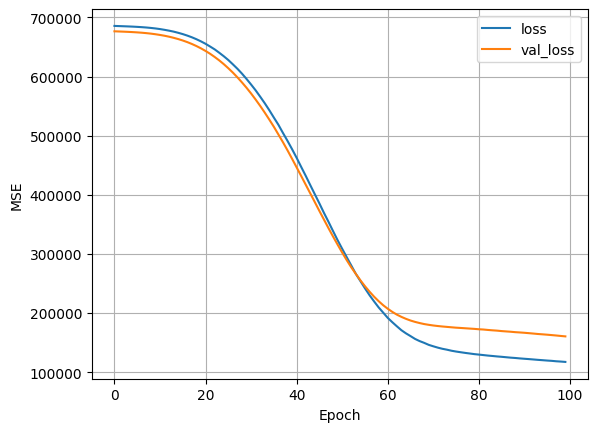

In [51]:
plot_loss(history)

In [52]:
# calculate the MSE for both linear reg and nn
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

3/3 [==============================] - 0s 7ms/step


In [53]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [54]:
MSE(y_pred_lr, y_test_all)

87284.77721146864

In [55]:
MSE(y_pred_nn, y_test_all)

96287.62683348166

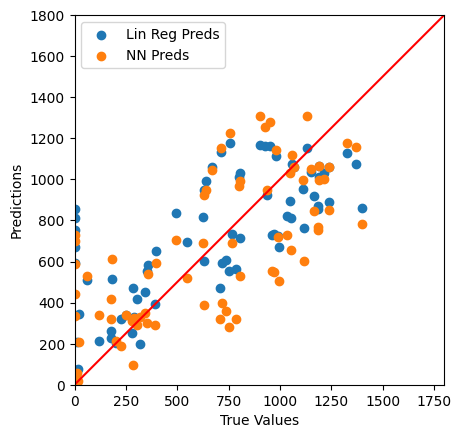

In [56]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label="Lin Reg Preds")
plt.scatter(y_test_all, y_pred_nn, label="NN Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")

# Unsupervised Machine Learning (K-means and PCA)

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
cols = ["area","perimeter", "compactness", "length","width","asymmetry","groove", "class"]
df = pd.read_csv("seeds_dataset.txt", names = cols, sep="\s+")

In [61]:
df.head()

area  perimeter  compactness  length  width  asymmetry  groove  class
0  15.26      14.84       0.8710   5.763  3.312      2.221   5.220      1
1  14.88      14.57       0.8811   5.554  3.333      1.018   4.956      1
2  14.29      14.09       0.9050   5.291  3.337      2.699   4.825      1
3  13.84      13.94       0.8955   5.324  3.379      2.259   4.805      1
4  16.14      14.99       0.9034   5.658  3.562      1.355   5.175      1

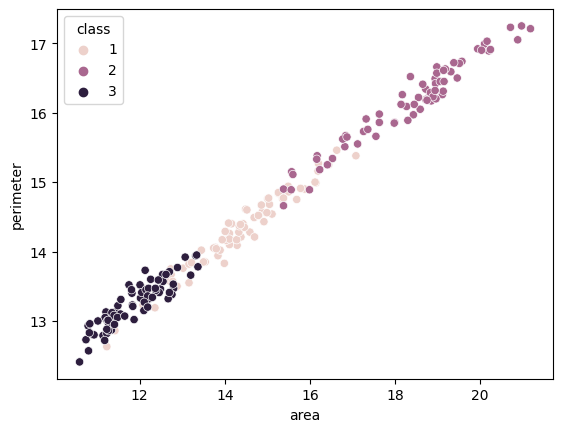

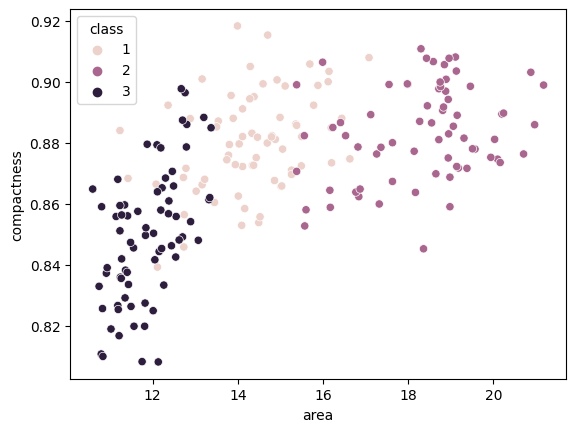

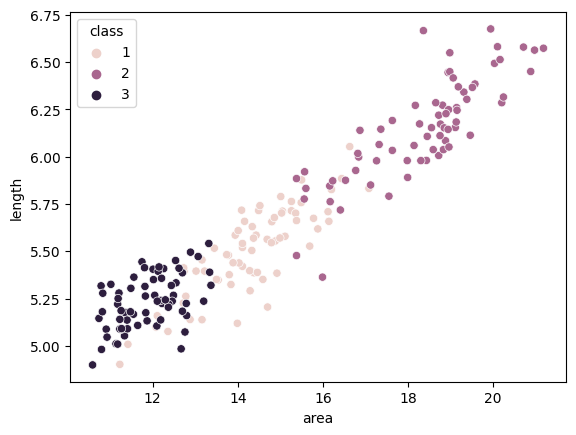

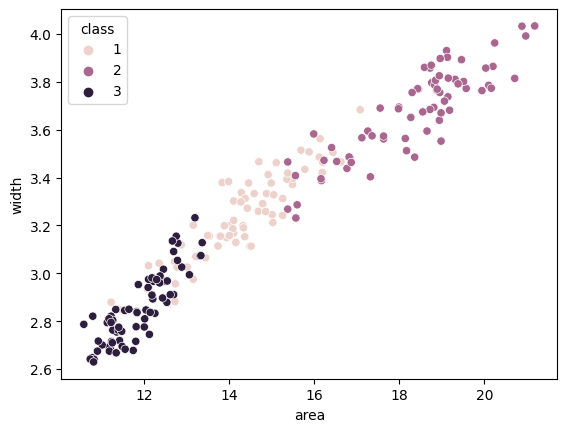

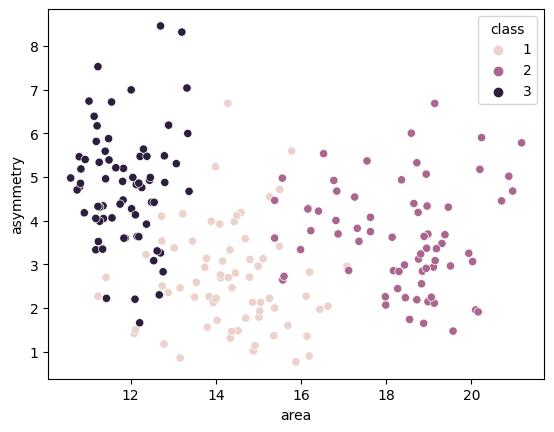

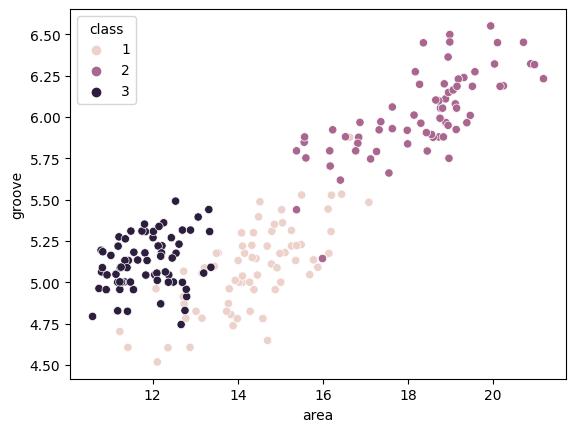

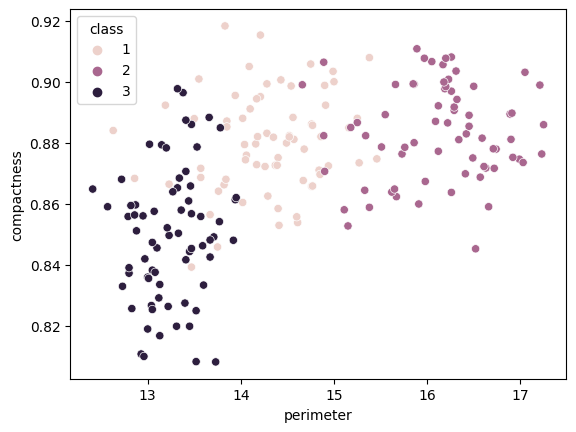

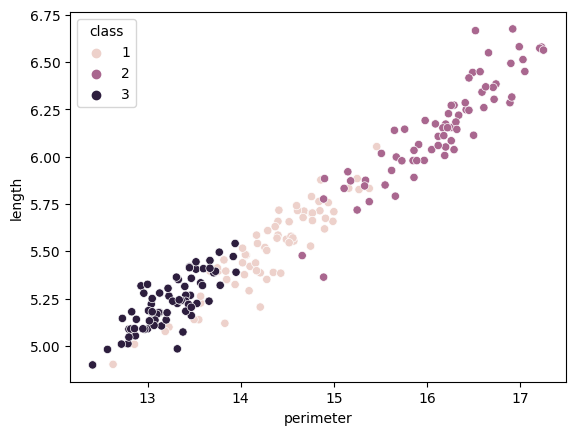

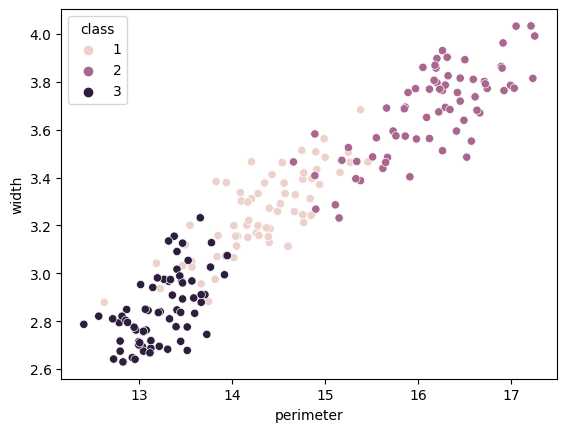

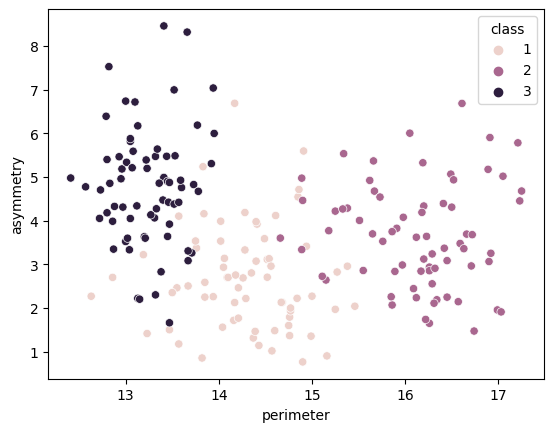

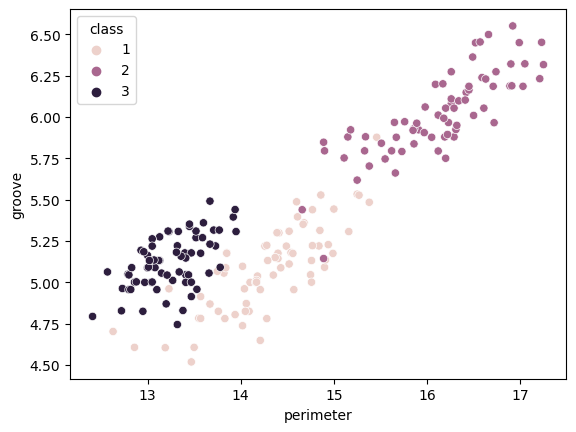

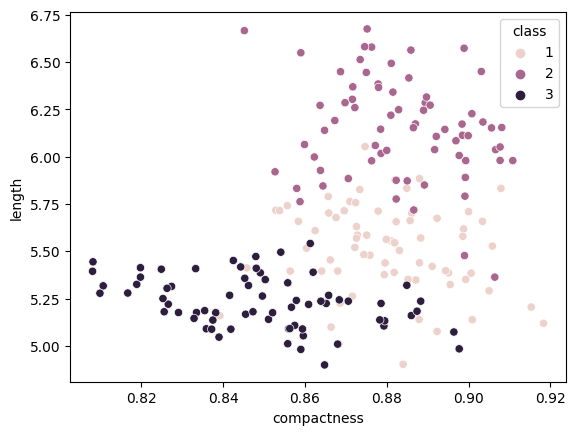

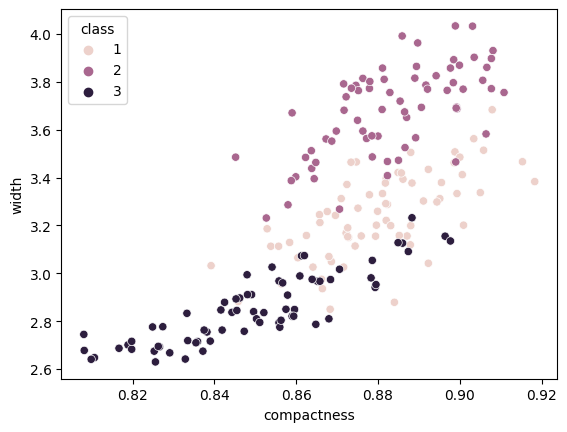

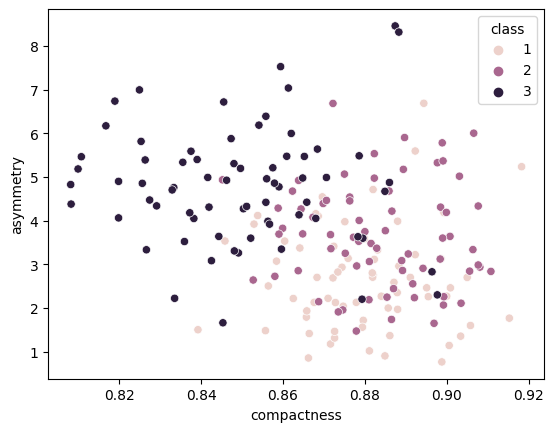

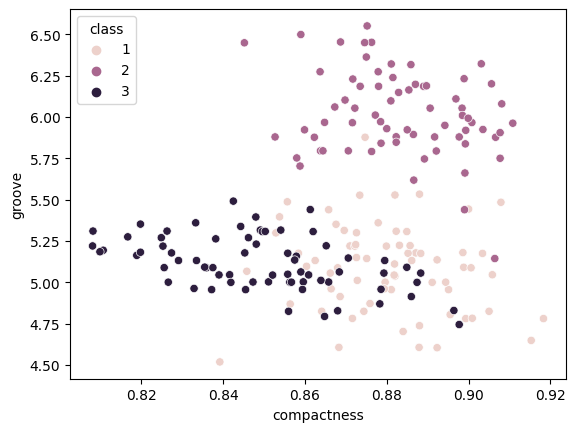

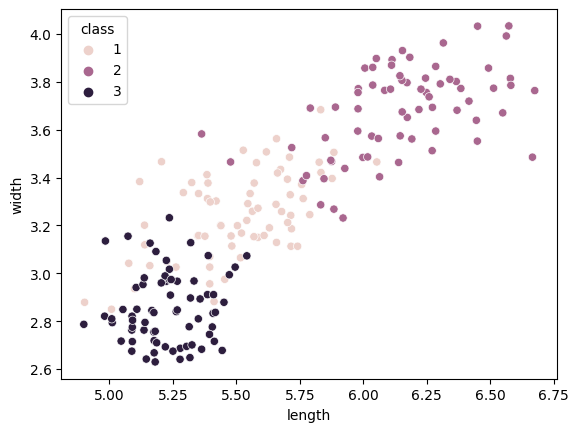

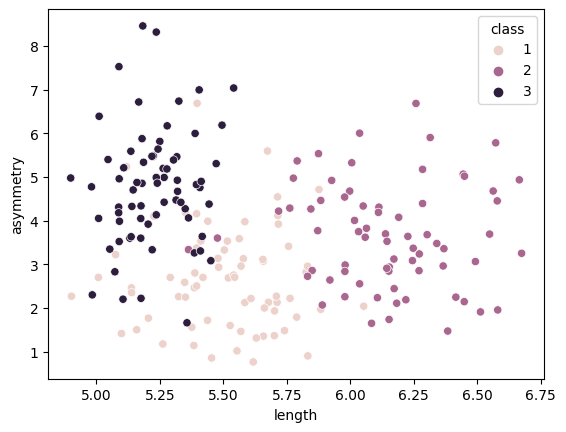

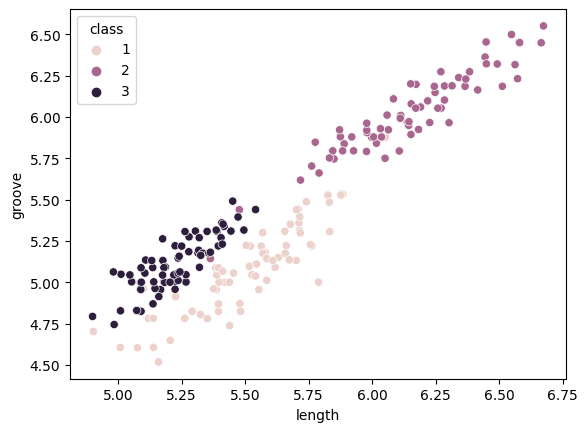

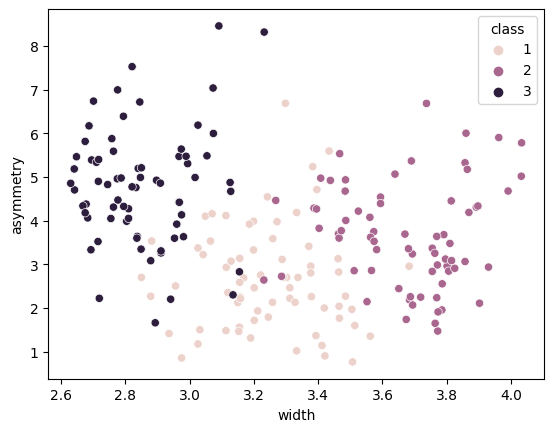

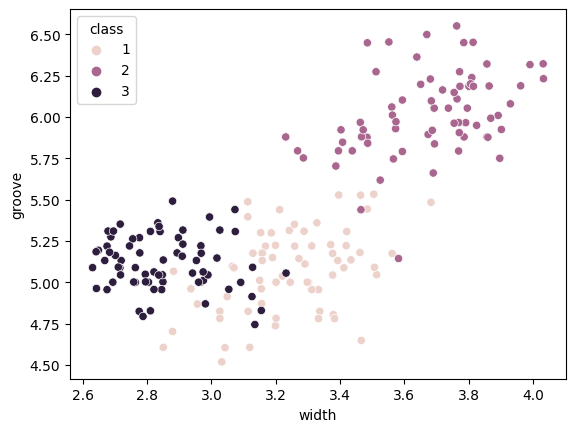

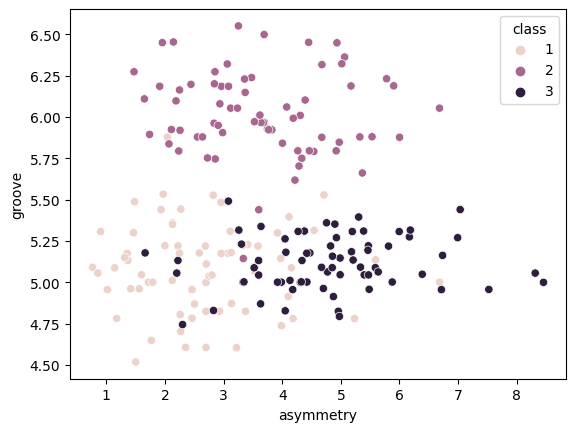

In [62]:
for i in range(len(cols)-1):
  for j in range(i+1, len(cols)-1):
    x_label = cols[i]
    y_label = cols[j]
    sns.scatterplot(x=x_label, y=y_label, data=df, hue='class')
    plt.show()

<h2><b>K-Means Clustering</b></h2>

In [63]:
from sklearn.cluster import KMeans

In [64]:
x = "compactness"
y = "asymmetry"
X = df[[x, y]].values

In [65]:
kmeans = KMeans(n_clusters = 3).fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [66]:
clusters = kmeans.labels_

In [67]:
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=[x, y, "class"])

[]

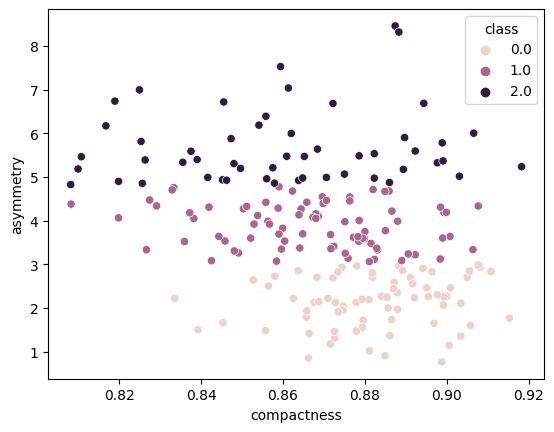

In [68]:
# K Means classes
sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)
plt.plot()

[]

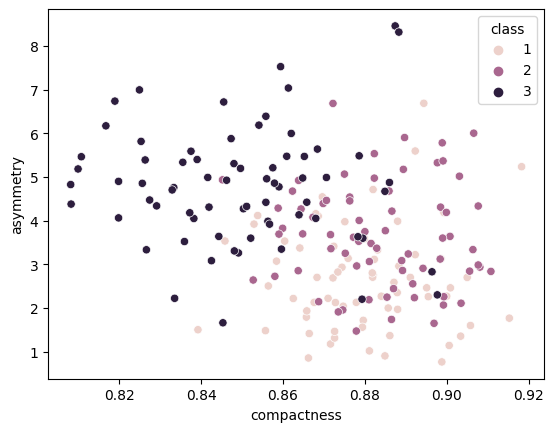

In [69]:
# Original classes
sns.scatterplot(x=x, y=y, hue='class', data=df)
plt.plot()

<h2><b>Higher Dimensions </b></h2>

In [70]:
X = df[cols[:-1]].values

In [71]:
kmeans = KMeans(n_clusters = 3).fit(X)
cluster_df = pd.DataFrame(np.hstack((X, kmeans.labels_.reshape(-1, 1))), columns=df.columns)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[]

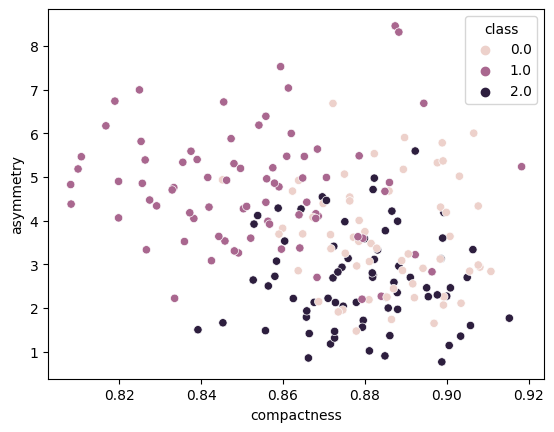

In [72]:
# K Means classes
sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)
plt.plot()

[]

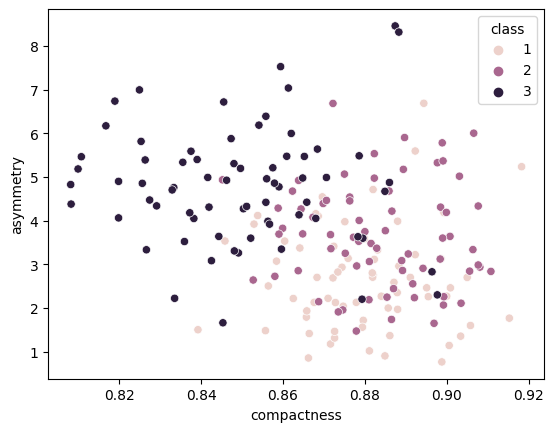

In [73]:
# Original classes
sns.scatterplot(x=x, y=y, hue='class', data=df)
plt.plot()

<b><h2>PCA</b></h2>

In [74]:
from sklearn.decomposition import PCA

In [75]:
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)

In [76]:
X.shape

(210, 7)

In [78]:
transformed_x.shape

(210, 2)

In [79]:
transformed_x[:5]

array([[ 0.66344838, -1.41732098],
       [ 0.31566651, -2.68922915],
       [-0.6604993 , -1.13150635],
       [-1.0552759 , -1.62119002],
       [ 1.61999921, -2.18338442]])

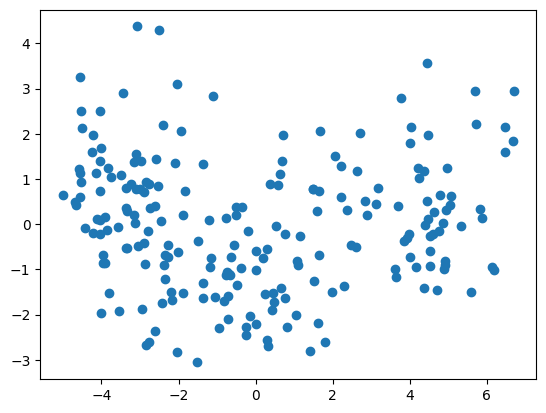

In [80]:
plt.scatter(transformed_x[:,0], transformed_x[:,1])
plt.show()

In [81]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1, 1))), columns=["pca1", "pca2", "class"])

In [82]:
truth_pca_df = pd.DataFrame(np.hstack((transformed_x, df["class"].values.reshape(-1, 1))), columns=["pca1", "pca2", "class"])

[]

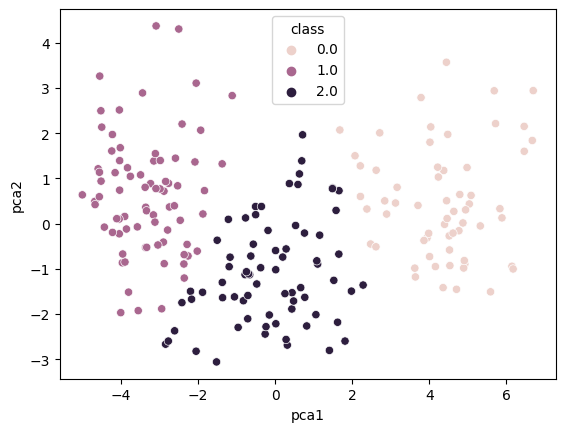

In [83]:
# K Means classes
sns.scatterplot(x="pca1", y="pca2", hue='class', data=kmeans_pca_df)
plt.plot()

[]

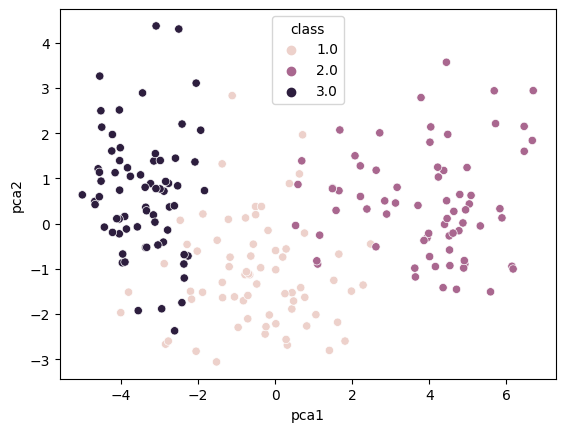

In [84]:
# Truth classes
sns.scatterplot(x="pca1", y="pca2", hue='class', data=truth_pca_df)
plt.plot()